In [17]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from IPython.display import Image, display


In [18]:
# Configurations
LOGIN_URL = "https://the-internet.herokuapp.com/login"
VALID_USER = "tomsmith"
VALID_PASS = "SuperSecretPassword!"
INVALID_USER = "kasongo"
INVALID_PASS = "wantam"

In [19]:
def login_test(username, password, screenshot_name):
  # Set up headless Chrome
  options = Options()
  options.add_argument("--headless=new")
  driver = webdriver.Chrome(options=options)
  driver.get(LOGIN_URL)
  
  # Wait for page to load
  driver.implicitly_wait(5)
  
  # Input credentials
  driver.find_element(By.ID, "username").send_keys(username)
  driver.find_element(By.ID, "password").send_keys(password)
  driver.find_element(By.CSS_SELECTOR, "button[type='submit']").click()
  
  # Wait for result
  time.sleep(2)
  
  # AI-style assertions and screenshots
  try:
    if username == VALID_USER and password == VALID_PASS:
      # Displays success message
      assert "You logged into  a secure area!" in driver.page_source
      result = "SUCCESS"
    else:
      # Displays error message
      assert "Your username is invalid!" in driver.page_source
      result = "FAILURE"
  except AssertionError:
    result = "UNEXPECTED RESULT"
    
  # Screenshot
  driver.save_screenshot(screenshot_name)
  driver.quit()
  return result

Valid credentials test result: UNEXPECTED RESULT


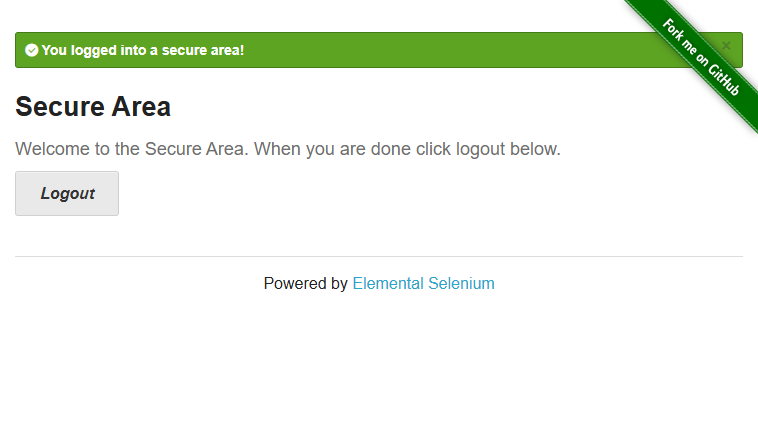

Invalid credentials test result: FAILURE


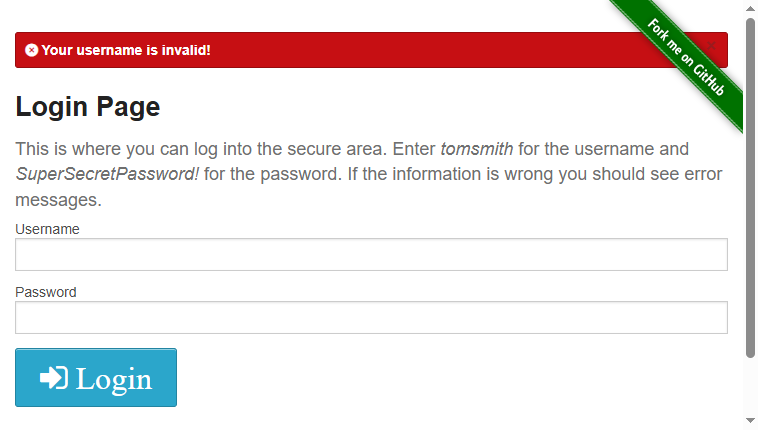

In [20]:
# Run both test cases
results = {}
results['valid'] = login_test(VALID_USER, VALID_PASS, "login_success.png")
results['invalid'] = login_test(INVALID_USER, INVALID_PASS, "login_fail.png")

# Displays results and screenshots
for case, outcome in results.items():
  print(f"{case.title()} credentials test result: {outcome}")
  display(Image(filename=f"login_{'success' if case == 'valid' else 'fail'}.png"))

**AI-driven testing vs. manual testing:**

Automated testing with AI plugins or enhanced Selenium scripts significantly improves test coverage and reliability compared to manual testing. AI-enhanced tools can intelligently wait for elements to appear, adapt to minor UI changes, and identify hidden issues through anomaly detection. This reduces false negatives and increases resilience against UI modifications that would break traditional scripts. By automatically running multiple test cases—valid and invalid logins, for example—AI-driven automation covers a broader range of scenarios in less time. Additionally, features like auto-screenshot and smart assertions provide clear visual evidence and precise error localization, making debugging faster and more effective. Manual testers, in contrast, are prone to fatigue and may overlook edge cases or inconsistencies. AI-powered automation ensures consistent execution, thorough coverage, and early bug detection, ultimately leading to more robust and scalable applications. This approach not only saves time and effort but also ensures higher quality and reliability in software releases.